In [1]:
import pyxdf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data3, header = pyxdf.load_xdf('Data/s003.xdf')
exp_data3 = (pd.read_csv('final_exp_decoding/003.csv'))
data4, header = pyxdf.load_xdf('Data/s004.xdf')
exp_data4 = (pd.read_csv('final_exp_decoding/004.csv'))
data5, header = pyxdf.load_xdf('Data/s005.xdf')
exp_data5 = (pd.read_csv('final_exp_decoding/005.csv'))
data6, header = pyxdf.load_xdf('Data/s006.xdf')
exp_data6 = (pd.read_csv('final_exp_decoding/006.csv'))

Stream 2: Calculated effective sampling rate 60.0010 Hz is different from specified rate 90.0000 Hz.
Stream 2: Calculated effective sampling rate 60.0009 Hz is different from specified rate 90.0000 Hz.
Stream 2: Calculated effective sampling rate 60.0010 Hz is different from specified rate 90.0000 Hz.
Stream 2: Calculated effective sampling rate 60.0009 Hz is different from specified rate 90.0000 Hz.


In [3]:
data = [data3, data4, data5, data6]
exp_data = [exp_data3, exp_data4, exp_data5, exp_data6]
marker = 1
tobii = 0
n = 98 # num of trials
t = 4 # num of triggers in each trial
b = 1 # num of blocks

In [4]:
expected_value_b = []
expected_value_r = []

for j in range(100):
    if (exp_data[0][' offer_right'][j] == ' 1.png'):
        expected_value_b.append(exp_data[0][' exp_value_right'][j])
        expected_value_r.append(exp_data[0][' exp_value_left'][j])
    else:
        expected_value_r.append(exp_data[0][' exp_value_right'][j])
        expected_value_b.append(exp_data[0][' exp_value_left'][j])
        

C:\Users\shakeda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\shakeda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\shakeda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorato

[None, None, None, None]

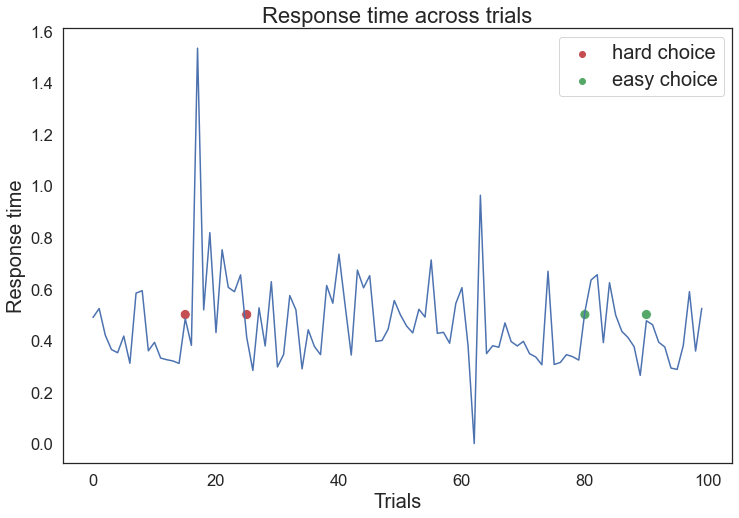

In [28]:
subject = 3
plt.figure(figsize=(12, 8))
sns.lineplot([i for i in range(100)], exp_data[subject][' rt'])
ax = sns.scatterplot([15, 25], [0.5 for _ in range(2)], palette=['r'], marker='o', hue=['hard choice' for i in range(2)], s=100)
sns.scatterplot([80, 90], [0.5 for _ in range(2)], palette=['g'], marker='o', hue=['easy choice' for i in range(2)], s=100)
plt.title("Response time across trials", fontsize=22) 
plt.xlabel("Trials", fontsize=20) 
sns.set(font_scale=1.5, style='white')
plt.ylabel("Response time", fontsize=20)
plt.setp(ax.get_legend().get_texts(), fontsize=20) 

In [103]:
# response times
response_times = []
for i in range(4):
    rt = exp_data[i][' rt'].to_numpy()
    easy = np.mean(rt[80:90])
    hard = np.mean(rt[15:25])
    response_times.append((i, hard, 'Hard'))
    response_times.append((i, easy, 'Easy'))

Text(0.5, 1.0, 'Average RT in easy and hard segments')

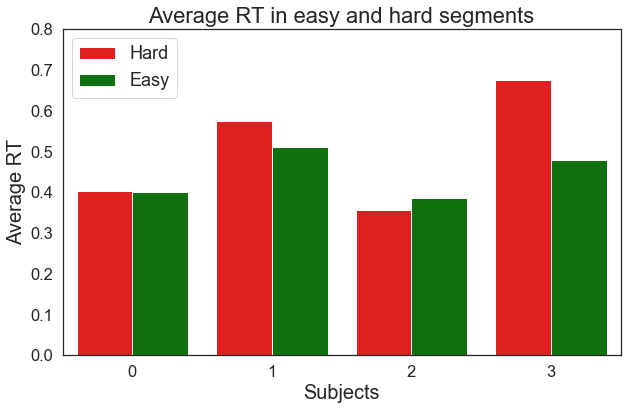

In [104]:
response_times_df = pd.DataFrame(data=response_times, columns=['subject', 'rt', 'title'])
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=response_times_df, x='subject', y='rt', hue='title', palette=['red', 'green'])
plt.ylim((0, 0.8))
ax.set_ylabel("Average RT", fontsize=20)
ax.set_xlabel('Subjects', fontsize=20)
plt.legend(loc='upper left', fontsize='medium')
plt.title('Average RT in easy and hard segments', fontsize=22)


In [106]:
# eye movement std on x axis - stimulus to choice
easy_stds=[[], [], [], []]
hard_stds=[[], [], [], []]
stds = []

for i in range(4):
    triggers = data[i][1]['time_stamps']
    stimulus_triggers = [triggers[i] for i in range(1, n * t * b, t)]
    choice_triggers = [triggers[i] for i in range(2, n * t * b, t)]
    eye_data = data[i][0]['time_series']
    eye_data_x = (eye_data[0:,25] + eye_data[0:, 23]) / 2
    eye_data_x = ((eye_data_x - np.nanmean(eye_data_x)) / np.nanstd(eye_data_x))
    eye_data_time = data[i][0]['time_stamps']
    walk = 15
    j = 0
    while (walk < 25):
        while (eye_data_time[j] < stimulus_triggers[walk]):
            j += 1
        stim = j
        while(eye_data_time[j] < choice_triggers[walk]):
            j += 1
        choice = j
        stds.append((i, np.nanstd(eye_data_x[stim:choice]), 'Hard'))
        hard_stds[i].append(np.nanstd(eye_data_x[stim:choice]))
        walk += 1
    
    walk = 80
    while(walk < 90):
        while (eye_data_time[j] < stimulus_triggers[walk]):
            j += 1
        stim = j
        while(eye_data_time[j] < choice_triggers[walk]):
            j += 1
        choice = j
        stds.append((i, np.nanstd(eye_data_x[stim:choice]), 'Easy'))
        easy_stds[i].append(np.nanstd(eye_data_x[stim:choice]))
        walk += 1


In [89]:
diffrences = []
for i in range(1, 4):
    diffrences.append(np.mean(hard_stds[i]) - np.nanmean(easy_stds[i]))
    
print(diffrences)
print(np.mean(diffrences))
  

[0.016308546, 0.014391899, 0.23459172]
0.088430725


C:\Users\shakeda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\shakeda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


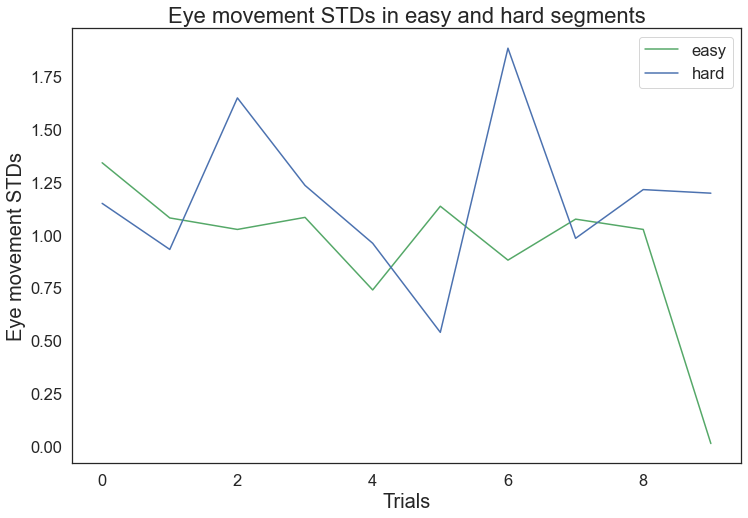

In [29]:
subject=3
plt.figure(figsize=(12, 8))
sns.lineplot([i for i in range(len(easy_stds[subject]))], easy_stds[subject], palette=['g'], hue=['easy' for i in range(len(easy_stds[subject]))])
sns.lineplot([i for i in range(len(hard_stds[subject]))], hard_stds[subject], hue=['hard' for i in range(len(hard_stds[subject]))])
plt.title("Eye movement STDs in easy and hard segments", fontsize=22) 
plt.xlabel("Trials", fontsize=20) 
plt.ylabel("Eye movement STDs", fontsize=20)
sns.set_style(style='white')

Text(0.5, 1.0, 'Eye-movements STDs in hard and easy segments')

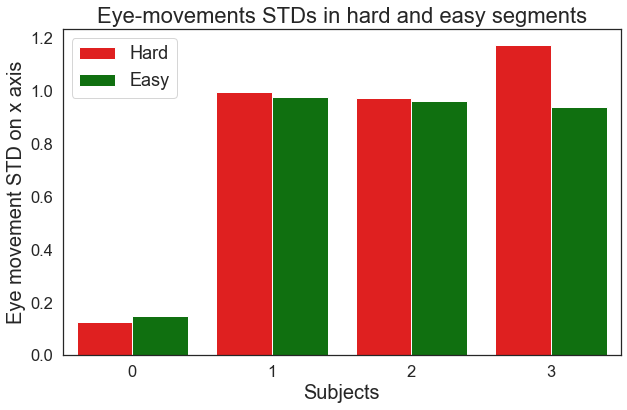

In [107]:
stds_df = pd.DataFrame(stds, columns=['subject', 'std', 'title'])
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=stds_df, x='subject', y='std', hue='title', palette=['red', 'green'], ci=None)
ax.set_ylabel("Eye movement STD on x axis", fontsize=20)
ax.set_xlabel('Subjects', fontsize=20)
plt.legend(loc='upper left', fontsize='medium')
plt.title('Eye-movements STDs in hard and easy segments', fontsize=22)

In [109]:
# eye movement std on x axis while using different strategies - stimulus to choice
std_by_strategy = []

for i in range(4):
    triggers = data[i][1]['time_stamps']
    stimulus_triggers = [triggers[i] for i in range(1, n * t * b, t)]
    choice_triggers = [triggers[i] for i in range(2, n * t * b, t)]
    eye_data = data[i][0]['time_series']
    eye_data_x = (eye_data[0:, 25] + eye_data[0:, 23]) / 2
    eye_data_x = ((eye_data_x - np.nanmean(eye_data_x)) / np.nanstd(eye_data_x))
    eye_data_time = data[i][0]['time_stamps']
    
    j = 0
    for walk in range(5, 98):
        while (eye_data_time[j] < stimulus_triggers[walk]):
            j += 1
        stim = j
        while (eye_data_time[j] < choice_triggers[walk]):
            j += 1
        choice = j
        if (exp_data[i][' chosen_card'][walk] == exp_data[i][' chosen_card'][walk - 1]):
            std_by_strategy.append((i, np.nanstd(eye_data_x[stim:choice]), 'Same'))
        else:
            std_by_strategy.append((i, np.nanstd(eye_data_x[stim:choice]), 'Change'))


C:\Users\shakeda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\lib\nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


Text(0.5, 1.0, 'Eye-movements STDs when choosing same or different strategy')

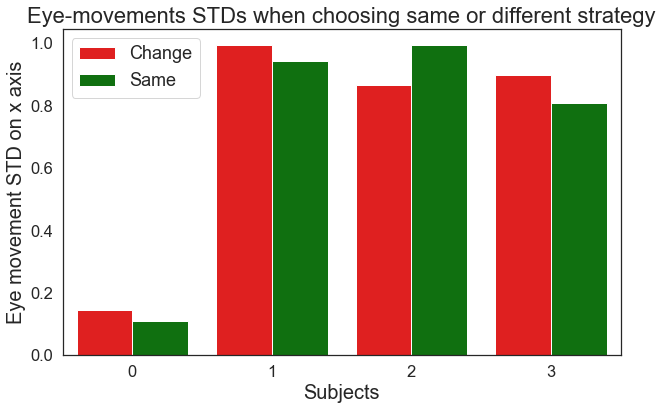

In [110]:
std_by_strategy_df = pd.DataFrame(std_by_strategy, columns=['subject', 'std', 'title'])
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=std_by_strategy_df, x='subject', y='std', hue='title', palette=['red', 'green'], ci=None)
ax.set_ylabel("Eye movement STD on x axis", fontsize=20)
ax.set_xlabel('Subjects', fontsize=20)
plt.legend(loc='upper left', fontsize='medium')
plt.title('Eye-movements STDs when choosing same or different strategy', fontsize=22)